# Part 1: Linear Regression with One Variable

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
class OneVariable:
    
    def __init__(self):
        pass

    @staticmethod
    def gradient(x, y, b):
        res = b[0] + b[1] * x - y   
        return res.mean(), (res * x).mean()

    @staticmethod
    def mse(x, y, b):
        return np.mean(np.square(b[0] + b[1] * x - y)) / 2

    @staticmethod
    def gradient_descent(x, y, start, learn_rate=0.01, n_iter=10_000, tolerance=1e-06, dtype="float64"):
        dtype_ = np.dtype(dtype)

        n_iter = int(n_iter)
        x, y = np.array(x, dtype=dtype_), np.array(y, dtype=dtype_)
        vector = np.array(start, dtype=dtype_)
        learn_rate = np.array(learn_rate, dtype=dtype_)
        tolerance = np.array(tolerance, dtype=dtype_)

        losses = []  # List to store MSE values at each iteration
        b_values = [[], []]  # List to store b0 and b1 values at each iteration

        for i in range(n_iter):
            diff = -learn_rate * np.array(OneVariable.gradient(x, y, vector), dtype_)
            losses.append(OneVariable.mse(x, y, vector))
            b_values[0].append(vector[0])  # Store b0 value
            b_values[1].append(vector[1])  # Store b1 value

            if np.all(np.abs(diff) <= tolerance):
                break

            vector += diff

        return vector if vector.shape else vector.item(), losses, b_values

    @staticmethod
    def stochastic_gradient_descent(x, y, start, learn_rate=0.01, n_iter=10_000, tolerance=1e-06, dtype="float64", random_state=None):
        dtype_ = np.dtype(dtype)

        n_iter = int(n_iter)
        x, y = np.array(x, dtype=dtype_), np.array(y, dtype=dtype_)
        vector = np.array(start, dtype=dtype_)
        learn_rate = np.array(learn_rate, dtype=dtype_)
        tolerance = np.array(tolerance, dtype=dtype_)

        n_obs = x.shape[0]

        seed = None if random_state is None else int(random_state)
        rng = np.random.default_rng(seed=seed)

        losses = []
        b_values = [[], []]

        for _ in range(n_iter):
            index = rng.choice(n_obs)
            x_batch, y_batch = x[index:index+1], y[index:index+1] 

            grad = np.array(OneVariable.gradient(x_batch, y_batch, vector), dtype_)
            diff = -learn_rate * grad

            losses.append(OneVariable.mse(x_batch, y_batch, vector))
            b_values[0].append(vector[0])
            b_values[1].append(vector[1])

            if np.all(np.abs(diff) <= tolerance):
                break

            vector += diff

        return vector if vector.shape else vector.item(), losses, b_values

    @staticmethod
    def mini_batch_gradient_descent(x, y, start, learn_rate=0.01, batch_size=32, n_iter=10_000, tolerance=1e-06, dtype="float64", random_state=None):
        dtype_ = np.dtype(dtype)

        batch_size = int(batch_size)
        n_iter = int(n_iter)
        x, y = np.array(x, dtype=dtype_), np.array(y, dtype=dtype_)
        vector = np.array(start, dtype=dtype_)
        learn_rate = np.array(learn_rate, dtype=dtype_)
        tolerance = np.array(tolerance, dtype=dtype_)

        n_obs = x.shape[0]
        n_batches = int(np.ceil(n_obs / batch_size))  # Calculate number of batches

        seed = None if random_state is None else int(random_state)
        rng = np.random.default_rng(seed=seed)

        losses = []  # List to store MSE values at each iteration
        b_values = [[], []]  # List to store b0 and b1 values at each iteration

        for _ in range(n_iter):
            rng.shuffle(np.c_[x, y])  # Shuffle data for each iteration (optional)

            for i in range(n_batches):
                # Define batch indices
                start_idx = i * batch_size
                end_idx = min((i + 1) * batch_size, n_obs)  # Handle potential last batch

                x_batch, y_batch = x[start_idx:end_idx], y[start_idx:end_idx]

                grad = np.array(OneVariable.gradient(x_batch, y_batch, vector), dtype_)
                diff = -learn_rate * grad

                losses.append(OneVariable.mse(x_batch, y_batch, vector))  # Calculate loss on mini-batch

                b_values[0].append(vector[0])  # Store b0 value
                b_values[1].append(vector[1])  # Store b1 value

                if np.all(np.abs(diff) <= tolerance):
                    return vector, losses, b_values  # Early stopping with losses and b_values

                vector += diff

        return vector if vector.shape else vector.item(), losses, b_values

    @staticmethod
    def plot_loss_function(x, y, vector, losses, b_values, flg=0):
        # Plot the loss function (losses) vs iterations
        plt.figure()
        plt.plot(range(len(losses)), losses)
        plt.xlabel('Iterations')
        plt.ylabel('Mean Squared Error (Loss)')
        s = ' '
        if flg == 1:
            s = ' Stochastic '
        elif flg == 2:
            s = ' Mini Batch '
        title = 'Loss Function During' + s + 'Gradient Descent'
        plt.title(title)

        # Plot b values vs iterations
        plt.figure()
        plt.plot(range(len(b_values[0])), b_values[0], label='b0')
        plt.plot(range(len(b_values[1])), b_values[1], label='b1')
        plt.xlabel('Iterations')
        plt.ylabel('b values')
        title = 'b values During' + s + 'Gradient Descent'
        plt.title(title)
        plt.legend()
        plt.show()

    @staticmethod
    def plot_line(x, y, b, flg=0):
        plt.scatter(x, y, color='black')
        x_range = range(min(x) - 1, max(x) + 2)
        color = 'red'
        if flg == 1:
            color = 'orange'
        elif flg == 2:
            color = 'blue'
        plt.plot(x_range, [b[1] * x_i + b[0] for x_i in x_range], color=color, label='Regression Line')
        plt.xlabel('X')
        plt.ylabel('Y')
        title = 'Gradient Descent'
        if flg == 1:
            title = 'Stochastic ' + title
        elif flg == 2:
            title = 'Mini Batch ' + title
        plt.title(title)
        plt.legend()
        plt.show()

In [21]:
def main1():
    x, y = get_input()

    one_var = OneVariable()
    
    # Gradient Descent
    vector, losses, b_values = one_var.gradient_descent(x, y, start=[0.5, 0.5])

    print()
    print("Gradient Descent Algorithm")
    print(f"Intercept: {vector[0]}, slope: {vector[1]}")

    one_var.plot_loss_function(x, y, vector, losses, b_values, 0)
    one_var.plot_line(x, y, vector, 0)

    # Stochastic Gradient Descent
    vector_sgd, losses_sgd, b_values_sgd = one_var.stochastic_gradient_descent(x, y, start=[0.5, 0.5], learn_rate=0.0008, n_iter=10_000, random_state=0)

    print()
    print("Stochastic Gradient Descent Algorithm")
    print(f"Intercept: {vector_sgd[0]}, slope: {vector_sgd[1]}")

    one_var.plot_loss_function(x, y, vector_sgd, losses_sgd, b_values_sgd, 1)
    one_var.plot_line(x, y, vector_sgd, 1)

    # Mini Batch Gradient Descent
    vector_mbgd, losses_mbgd, b_values_mbgd = one_var.mini_batch_gradient_descent(x, y, start=[0.5, 0.5], learn_rate=0.0008, batch_size=3, n_iter=10_000, random_state=0)

    print()
    print("Mini Batch Gradient Descent Algorithm")
    print(f"Intercept: {vector_mbgd[0]}, slope: {vector_mbgd[1]}")

    one_var.plot_loss_function(x, y, vector_mbgd, losses_mbgd, b_values_mbgd, 2)
    one_var.plot_line(x, y, vector_mbgd, 2)

Enter number of points: 10
Enter X: 1 2 3 4 5 6 7 8 9 10
Enter Y: 5 7 6 9 8 13 12 14 11 15

Gradient Descent Algorithm
Intercept: 4.266190927035888, slope: 1.0424925779268681


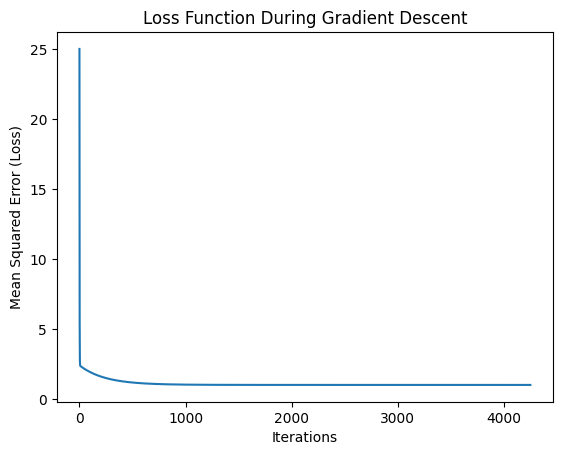

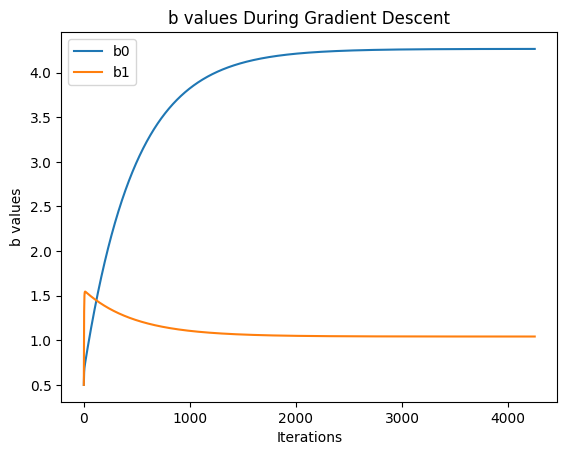

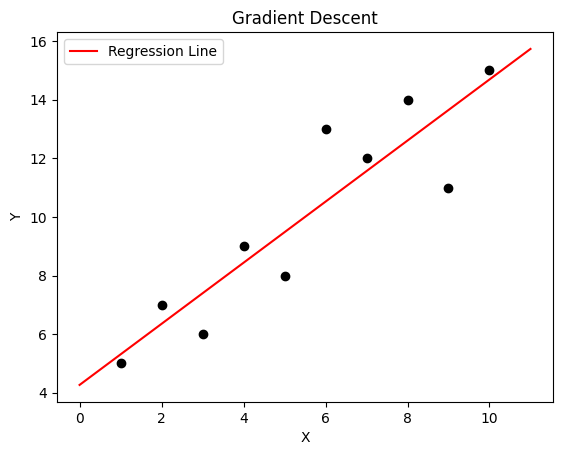


Stochastic Gradient Descent Algorithm
Intercept: 1.039891107490124, slope: 1.5657284220704093


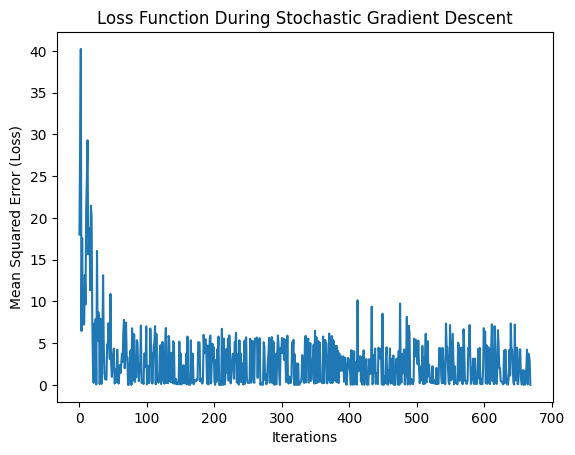

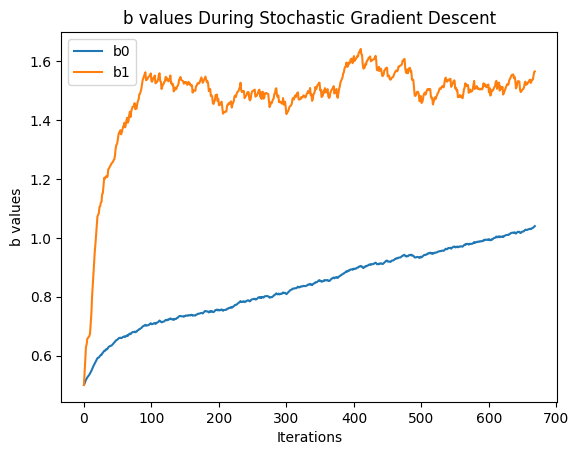

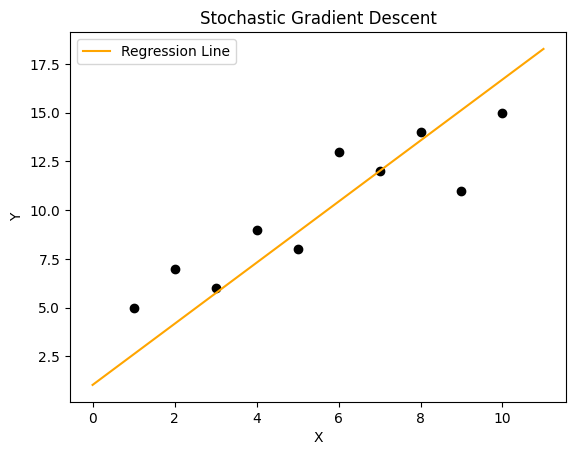


Mini Batch Gradient Descent Algorithm
Intercept: 3.517191421429181, slope: 1.1482817803202892


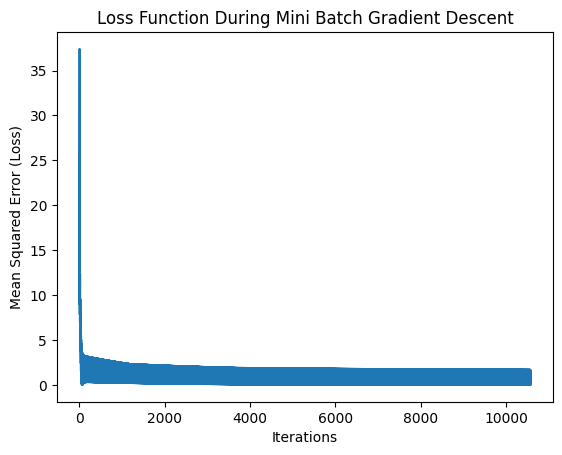

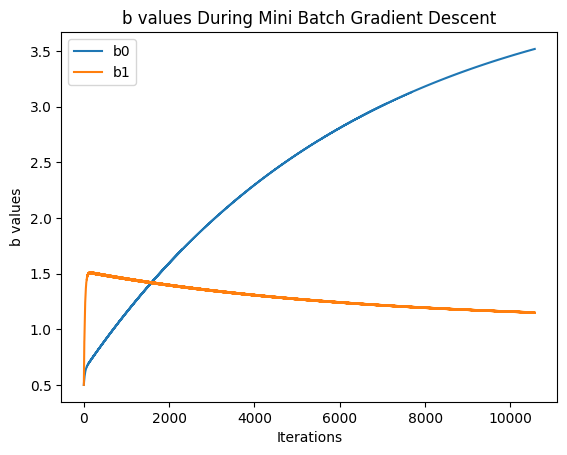

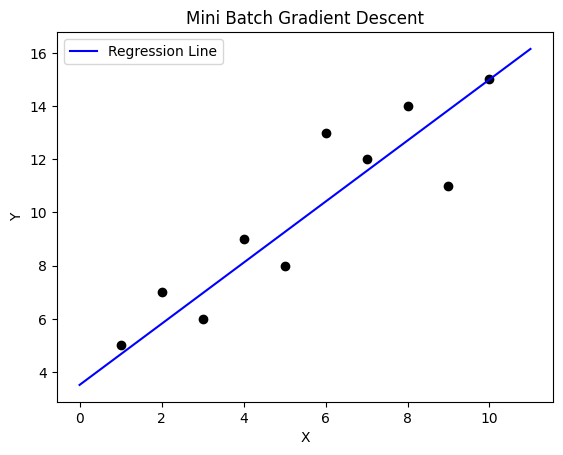

In [23]:
main1()

# Part 2: Linear Regression with Multi Variable

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [27]:
class MultiVariable:

    def __init__(self, features, target):
        self.features = (features - np.mean(features, axis=0)) / np.std(features, axis=0)
        self.target = (target - np.mean(target)) / np.std(target)
        self.features = np.hstack((np.ones((self.features.shape[0], 1)), self.features))
        self.weights = np.zeros(self.features.shape[1])
        self.learning_rate = 0.001
        self.max_steps = 1000
        self.convergence_threshold = 1e-6
        self.x_symbols = sp.symbols('x:{}'.format(self.features.shape[1] - 1))
        self.round = None

    def gradient_descent(self):
        losses = []
        prev_loss = 0

        for _ in range(self.max_steps):
            weights_gradient = -2 * self.features.T @ (self.target - (self.weights @ self.features.T))
            weights_temp = self.weights - self.learning_rate * weights_gradient
            loss = np.sum(np.square(self.target - (weights_temp @ self.features.T)))
            losses.append(loss)
            if abs(loss - prev_loss) < self.convergence_threshold:
                print("Converged")
                break

            self.weights = weights_temp
            prev_loss = loss

        self.show(losses)

    def mini_batch_gradient_descent(self, batch_size=5):
        losses = []
        prev_loss = 0

        for _ in range(self.max_steps):
            for j in range(0, len(self.features), batch_size):
                features_batch = self.features[j:j + batch_size, :]
                target_batch = self.target[j:j + batch_size]
                weights_gradient = -2 * features_batch.T @ (target_batch - (self.weights @ features_batch.T))
                weights_temp = self.weights - self.learning_rate * weights_gradient
                loss = np.sum(np.square(self.target - (weights_temp @ self.features.T)))
                losses.append(loss)
                self.weights = weights_temp
            if abs(loss - prev_loss) < self.convergence_threshold:
                print("Converged")
                break

            prev_loss = loss

        self.show(losses)

    def stochastic_gradient_descent(self):
        losses = []
        prev_loss = 0

        for _ in range(self.max_steps):
            for j in range(len(self.features)):
                feature_point = self.features[j, :]
                target_point = self.target[j]
                weights_gradient = -2 * feature_point[np.newaxis, :].T @ (np.array([target_point]) - (self.weights @ feature_point[np.newaxis, :].T))
                weights_temp = self.weights - self.learning_rate * weights_gradient
                loss = np.sum(np.square(self.target - (weights_temp @ self.features.T)))
                losses.append(loss)
                self.weights = weights_temp
            if abs(loss - prev_loss) < self.convergence_threshold:
                print("Converged")
                break

            prev_loss = loss

        self.show(losses)

    def calculate_plane_equation(self):
        weights = self.weights

        def plane_eq(x, y):
            return weights[0] + weights[1] * x + weights[2] * y

        return plane_eq

    def print_equation(self):
        weights = self.weights[1:]
        bias = self.weights[0]
        equation = bias

        for i in range(len(weights)):
            equation += weights[i] * (self.x_symbols[i] - np.mean(self.features[:, i + 1])) / np.std(self.features[:, i + 1])

        equation_expr = sum([w * (x - m) / s for w, x, m, s in zip(weights, self.x_symbols, np.mean(self.features[:, 1:], axis=0), np.std(self.features[:, 1:], axis=0))]) + bias
        equation_expr = sp.expand(equation_expr) * np.std(self.target) + np.mean(self.target)
        equation_expr_rounded = sp.nsimplify(equation_expr, rational=True).evalf()
        rounded_equation = sp.N(equation_expr_rounded, self.round) if self.round is not None else equation_expr_rounded

        print("Equation:")
        print(sp.pretty(rounded_equation))

    def plot_loss(self, losses):
        plt.figure(figsize=(9, 6))
        plt.plot(range(len(losses)), losses, label='Loss function', color='blue')  # Change color to blue
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.gca().set_aspect('auto', adjustable='box')
        plt.show()

    def plot_result(self, plane_equation):
        if self.features.shape[1] < 3:
            print("Plotting requires at least two features.")
            return

        fig = plt.figure(figsize=(7, 7))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(self.features[:, 1], self.features[:, 2], self.target, c=self.target, cmap='plasma')  # Change colormap to plasma
        xmin, xmax = np.min(self.features[:, 1]), np.max(self.features[:, 1])
        ymin, ymax = np.min(self.features[:, 2]), np.max(self.features[:, 2])
        xx, yy = np.meshgrid(np.linspace(xmin, xmax, 10), np.linspace(ymin, ymax, 10))
        zz = plane_equation(xx, yy)
        ax.plot_surface(xx, yy, zz, alpha=0.5, cmap='plasma')  # Change colormap to plasma
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        ax.set_title('Data and Regression Plane')
        plt.show()

    def show(self, losses=None):
        if losses is not None:
            self.print_equation()
            plane_equation = self.calculate_plane_equation()
            self.plot_result(plane_equation)
            self.plot_loss(losses)
        else:
            self.print_equation()
            plane_equation = self.calculate_plane_equation()
            self.plot_result(plane_equation)

In [28]:
def main2():
    # Input data
    features = np.array([[3, 6], [6, 12], [9, 19], [7, 12]])
    target = np.array([4, 6, 8, 12])

    model = MultiVariable(features, target)
    model.learningRate = 0.00001
    model.round = None
    model.maxSteps = 1000
    model.batch_size = 10

    model.gradient_descent()
    # model.mini_batch_gradient_descent()
    # model.stochastic_gradient_descent()

Equation:
0.973760636923291⋅x₀ - 0.419047247865761⋅x₁ - 3.06507308280528e-17


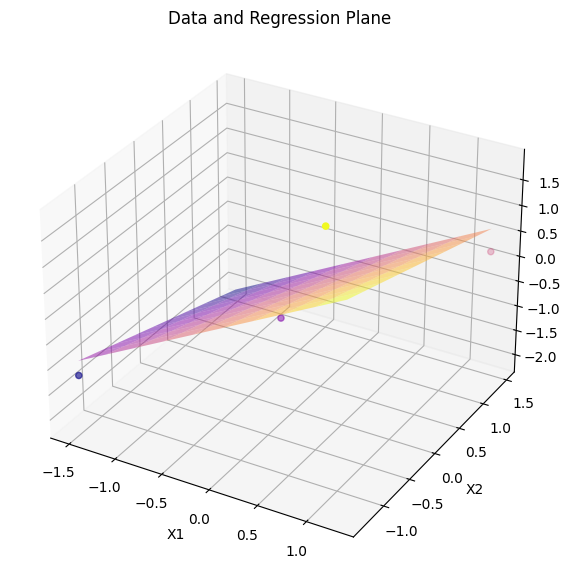

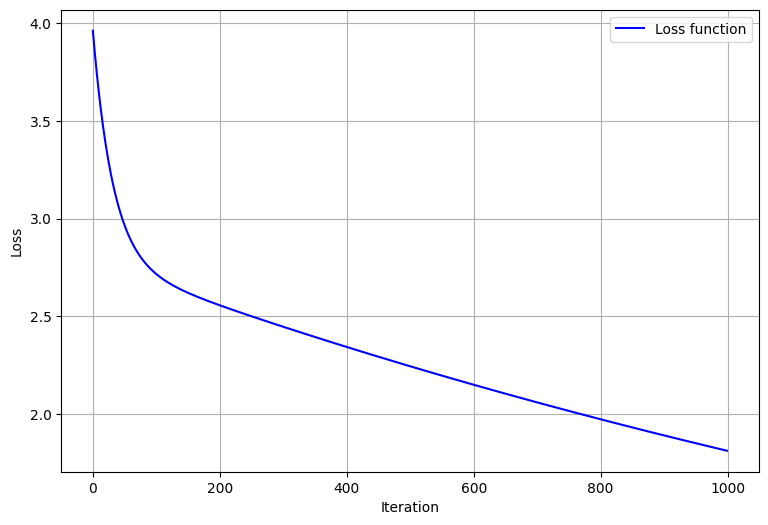

In [29]:
main2()